In [1]:
from pathlib import Path
import glob
import pandas as pd
import seaborn as sns
from Bio import SeqIO 
from Bio import AlignIO
from Bio import Phylo
from Bio.Phylo.TreeConstruction import DistanceCalculator
from Bio.Phylo.TreeConstruction import DistanceTreeConstructor

In [6]:
datadir = 'C:/Users/Mei/Documents/DCL/data01/gen/nguyen_nc_2018/20190710-320lfastas/'

# Reading fasta files

In [23]:
from Bio import SeqIO

# Read a fasta file
for seq_record in SeqIO.parse(datadir+'A01_L008.fasta', "fasta"):
    print(seq_record.id)
    print(repr(seq_record.seq))
    print(seq_record.description)
    print(len(seq_record))
    print()

1
Seq('GATCACAGGTCTATCACCCTATTAACCACTCACGGGAGCTCTCCATGCATTTGG...ATG', SingleLetterAlphabet())
1 chrM:1-16571
16579

2
Seq('NNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNN...NNN', SingleLetterAlphabet())
2 chr1:1-249250621
2460



In [26]:
from Bio import SeqIO

# Read in multiple fasta files and save only the chrM's
labels = []
ff = glob.glob(f"{datadir}*.fasta")
fsts = []
sequences = []
for file in ff:
    print(file)
    label = file.split("\\")[-1].split("_")[0]
    labels.append(label)
    for record in SeqIO.parse(file, "fasta"):
        fsts.append(list(str(record.seq))) 
        record.id=label;record.name=label;
        if 'chrM' in record.description:
            sequences.append(record)

C:/Users/Mei/Documents/DCL/data01/gen/nguyen_nc_2018/20190710-320lfastas\A01_L008.fasta
C:/Users/Mei/Documents/DCL/data01/gen/nguyen_nc_2018/20190710-320lfastas\A03_L008.fasta
C:/Users/Mei/Documents/DCL/data01/gen/nguyen_nc_2018/20190710-320lfastas\A04_L008.fasta
C:/Users/Mei/Documents/DCL/data01/gen/nguyen_nc_2018/20190710-320lfastas\A05_L008.fasta
C:/Users/Mei/Documents/DCL/data01/gen/nguyen_nc_2018/20190710-320lfastas\A06_L008.fasta
C:/Users/Mei/Documents/DCL/data01/gen/nguyen_nc_2018/20190710-320lfastas\A07_L008.fasta
C:/Users/Mei/Documents/DCL/data01/gen/nguyen_nc_2018/20190710-320lfastas\A09_L008.fasta
C:/Users/Mei/Documents/DCL/data01/gen/nguyen_nc_2018/20190710-320lfastas\A10_L008.fasta
C:/Users/Mei/Documents/DCL/data01/gen/nguyen_nc_2018/20190710-320lfastas\A12_L008.fasta


In [27]:
labels

['A01', 'A03', 'A04', 'A05', 'A06', 'A07', 'A09', 'A10', 'A12']

# Writing Fasta files

In [28]:
SeqIO.write(sequences, datadir+'A0x_L008_clean.fasta', "fasta")

9

# Aligning Sequences

To install MUSCLE: https://www.drive5.com/muscle/manual/index.html

Run MUSCLE in a command line:
<pre>muscle3.8.31_i86win32.exe -in ..\data01\gen\nguyen_nc_2018\20190710-320lfastas\A0x_L008_clean.fasta -out ..\data01\gen\nguyen_nc_2018\20190710-320lfastas\A0x_L008_clean.faa</pre>

This will take a while for long/many sequences.

It's possible to use stdin and stdout with MUSCLE and avoid a temporary alignment file but I wouldn't recommend that for long or multiple sequences.

# Reading Alignments

In [7]:
from Bio import AlignIO

# read in the alignments
alignments = AlignIO.read(datadir+'A0x_L008_clean.faa', 'fasta')
print(alignments)

SingleLetterAlphabet() alignment with 9 rows and 17006 columns
GATCACAGGTCTATCACCCTATTAACCACTCACGGGAGCTCTCC...ATG A06
GATCACAGGTCTATCACCCTATTAACCACTCACGGGAGCTCTCC...ATG A07
GATCACAGGTCTATCACCCTATTAACCACTCACGGGAGCTCTCC...ATG A12
GATCACAGGTCTATCACCCTATTAACCACTCACGGGAGCTCTCC...ATG A04
GATCACAGGTCTATCACCCTATTAACCACTCACGGGAGCTCTCC...ATG A05
GATCACAGGTCTATCACCCTATTAACCACTCACGGGAGCTCTCC...ATG A03
GATCACAGGTCTATCACCCTATTAACCACTCACGGGAGCTCTCC...ATG A10
GATCACAGGTCTATCACCCTATTAACCACTCACGGGAGCTCTCC...ATG A01
GATCACAGGTCTATCACCCTATTAACCACTCACGGGAGCTCTCC...ATG A09


# Calculating distance using BioPython

BioPython Phylo documention: https://biopython.org/wiki/Phylo

In [2]:
from Bio.Phylo.TreeConstruction import DistanceCalculator

In [3]:
DistanceCalculator.dna_models

['blastn', 'trans']

In [8]:
# calculate the distances
calculator = DistanceCalculator('identity')
distance = calculator.get_distance(alignments)
print(distance)

A06	0
A07	0.027460896154298475	0
A12	0.0274020933788075	0.026284840644478447	0
A04	0.021992238033635148	0.023462307420910267	0.02334470186992821	0
A05	0.023932729624838278	0.023579912971892325	0.024638362930730295	0.02158061860519822	0
A03	0.021110196401270098	0.02158061860519822	0.023403504645419293	0.018816888157121014	0.020933788074797177	0
A10	0.02499117958367636	0.024285546277784342	0.02634364341996942	0.021110196401270098	0.023579912971892325	0.019875338115959096	0
A01	0.0175820298718099	0.021933435258144174	0.021992238033635148	0.01605315770904392	0.018405268728683977	0.016582382688462904	0.01952252146301303	0
A09	0.01428907444431382	0.014171468893331762	0.015994354933552835	0.010466894037398533	0.013524638362930719	0.009996471833470522	0.012819005057038702	0.008585205221686487	0
	A06	A07	A12	A04	A05	A03	A10	A01	A09


In [35]:
distance.names

['A06', 'A07', 'A12', 'A04', 'A05', 'A03', 'A10', 'A01', 'A09']

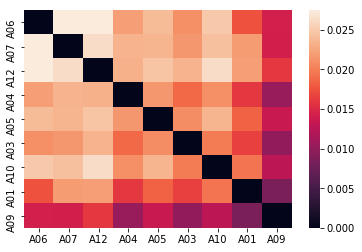

In [37]:
sns.heatmap(distance, xticklabels=distance.names, yticklabels=distance.names);

# Heirarchical Clustering

In [46]:
from Bio.Phylo.TreeConstruction import DistanceTreeConstructor
from Bio import Phylo

# nj = Neighbor Joining
# UPGMA = Unweighted Pair Group Method with Arithmetic Mean
tree = DistanceTreeConstructor(calculator, "nj").build_tree(alignments)

Phylo.draw_ascii(tree)

    ____ A09
  _|
 | |  ____________________________________________ A04
 | |_|
 |   |     _____________________________ A01
 |   |____|
 |        |________________________________________________________ A06
 |
 |    ______________________________________________________ A05
 |   |
_|___|___________________________________________________________________ A12
 |   |
 |   |_____________________________________________________________ A07
 |
 |_________________________________________ A03
 |
 |_______________________________________________________ A10



https://en.wikipedia.org/wiki/Distance_matrices_in_phylogeny